<a href="https://colab.research.google.com/github/kartar19/IBM-CAPSTONE-PROJECT-/blob/master/Time_Series_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Time Series Analysis in Python - learning from Anatyics Vidya
Loading time series dataset correctly in Pandas
Indexing in Time-Series Data
Time-Resampling using Pandas
Rolling Time Series
Plotting Time-series Data using Pandas

Data location
https://fred.stlouisfed.org/series/UMTMVS



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Loading data in Pandas
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UMTMVS.csv')
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [4]:
#Since we are working on time series, so "DATE" column has to be the index. Changing the index
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UMTMVS.csv', index_col='DATE')
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [5]:
# Though the 'DATE' columns i made as index, but check the data type  of all the columsn and specifically fo DATE to check if tihs is correct data type 
#\n and if not then change it
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01'],
      dtype='object', name='DATE', length=344)

In [6]:
# since the 'DATE' type is an object, so this needs to be converted to date time type.

df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='DATE', length=344, freq=None)

In [7]:
df.isnull().count()

UMTMVS    344
dtype: int64

In [8]:
# Reloading the data now as "DATE" type is now date time.
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/UMTMVS.csv', index_col= 'DATE', parse_dates= True)
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [9]:
#checking index type as DATE.
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='DATE', length=344, freq=None)

In [10]:
#Indexing in timeseries data:
# Looking for data between a particular month or days
df.loc['1992-01-01':'2001-01-01']

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0
...,...
2000-09-01,377093.0
2000-10-01,356771.0
2000-11-01,344370.0


In [12]:
# Indexing dara between a paricular period with step increase. here retrieving index after every 12 months
df.loc['1992-01-01': '2001-01-01': 12]

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


## Resampling or Group by index basis either month end, year end, month start, year start etc:
Think of resampling as groupby() where we group by based on any column and then apply an aggregate function to check our results. Whereas in the Time-Series index, we can resample based on any rule in which we specify whether we want to resample based on “Years” or “Months” or “Days or anything else.

Some important rules for which we resample our time series index are:

M = Month End
A = Year-End
MS = Month Start
AS = Year Start

In [14]:
# Resampling with start of year and taking mean of all the data for the year.
df.resample(rule = 'AS').mean().head()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667


In [16]:
# Resampling with Month End and taking mean of all the data for the year.
df.resample(rule = 'M').mean().head()

,UMTMVS
DATE,
1992-01-31,209438.0
1992-02-29,232679.0
1992-03-31,249673.0
1992-04-30,239666.0
1992-05-31,243231.0


##Rolling Time Series
 

Rolling is also similar to Time Resampling, but in Rolling, we take a window of any size and perform any function on it. In simple words, we can say that a rolling window of size k means k consecutive values.

In [18]:
df.rolling(window = 10).mean().head(20)

,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


In [21]:
# max number, first 10  after 30 rows of rolling.
df.rolling(window =30).max()[31:].head(10)

,UMTMVS
DATE,
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0
1995-03-01,303201.0
1995-04-01,303201.0


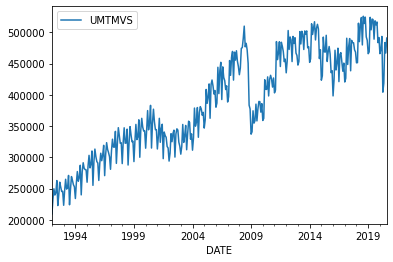

In [22]:
#Plotting Time Series
df.plot()

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

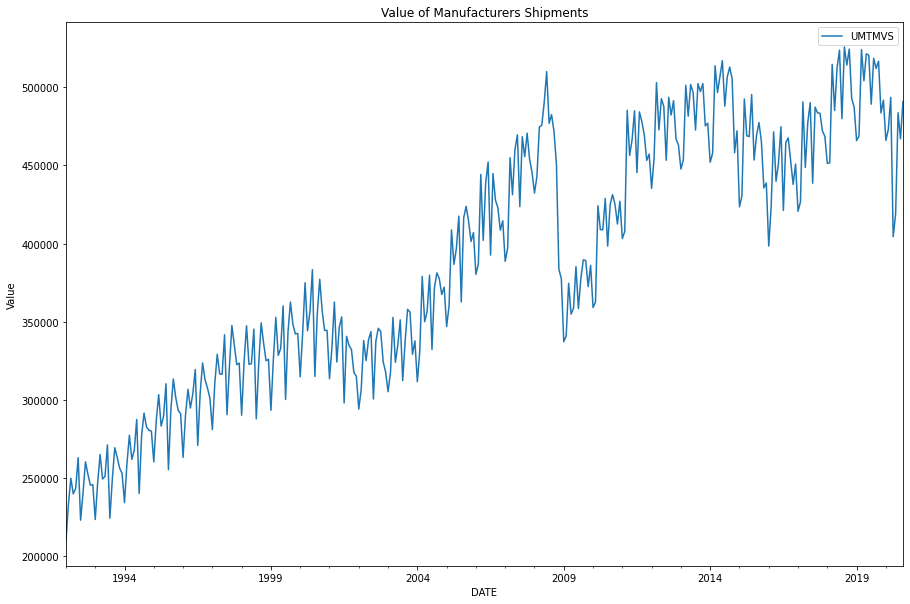

In [23]:
ax= df.plot(figsize=(15,10))
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

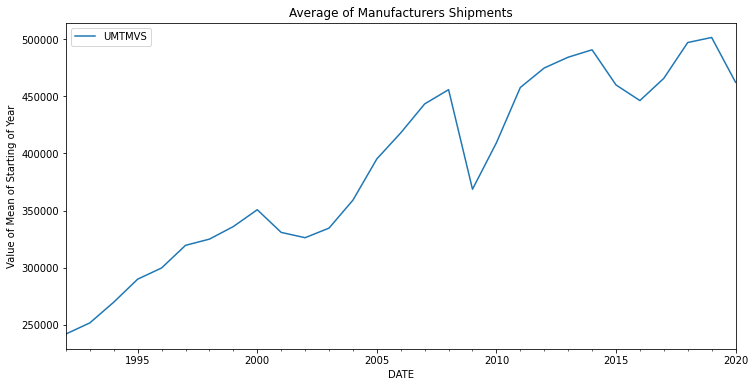

In [24]:
# plot with mean of starting value.
ax = df.resample(rule='AS').mean().plot(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

 